<h3>Data analyst Capatone</h3
                             >

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all library imported')

all library imported


In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


<h3>Structure of Data</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
# missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.dropna(inplace =True)

In [10]:
# missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.shape

(9541, 19)

In [13]:
df.duplicated().sum()

0

In [15]:
#the cities with maximum / minimum number of restaurants.
city_distribution = df['City'].value_counts()

In [19]:
max_city = city_distribution.idxmax()
min_city = city_distribution.idxmin()
print('city with max number of restuarants:'+max_city)
print('city with minimum number of restuarants:'+min_city)

city with max number of restuarants:New Delhi
city with minimum number of restuarants:Penola


In [24]:
# restuarant with most national presence
fr_presence = df['Restaurant Name'].value_counts()
max_frpresence = fr_presence.idxmax()
print('max frachise '+max_frpresence)

max frachise Cafe Coffee Day


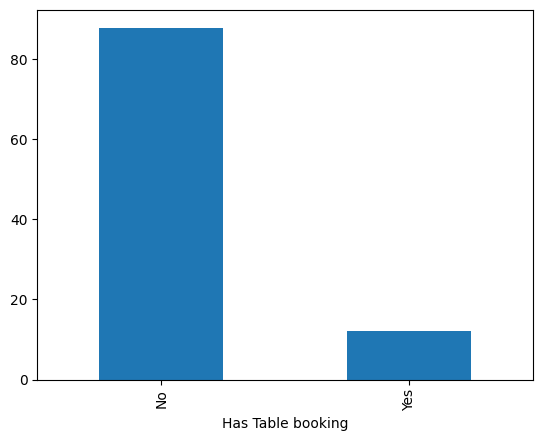

In [25]:
table_booking_ratio=df['Has Table booking'].value_counts(normalize=True)*100

table_booking_ratio.plot(kind='bar')

plt.show()

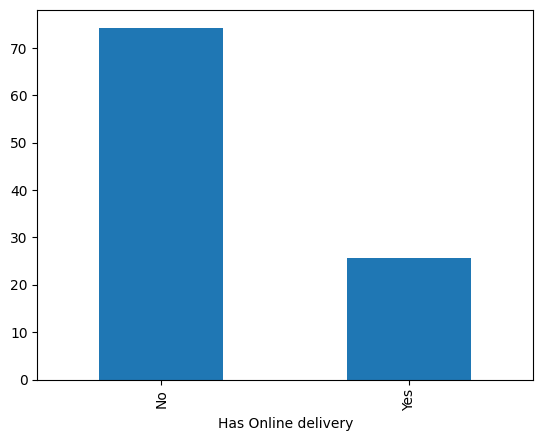

In [27]:
online_delivery=df['Has Online delivery'].value_counts(normalize=True)*100

online_delivery.plot(kind='bar')

plt.show()

In [29]:
delivery_votes = df.groupby('Has Online delivery')['Votes'].sum()
delivery_votes

Has Online delivery
No     977236
Yes    517914
Name: Votes, dtype: int64

In [30]:
df['Cuisines']

0                                    Italian, Continental
1                              Asian, Indonesian, Western
2                                         Sushi, Japanese
3                                                Japanese
4                                         French, Western
                              ...                        
9546                     Chinese, North Indian, Fast Food
9547                         Indian, Chinese, Continental
9548    Cafe, Continental, Desserts, Ice Cream, Italia...
9549                                          Street Food
9550                                Chinese, North Indian
Name: Cuisines, Length: 9541, dtype: object

In [31]:
top_10_cuisines = df['Cuisines'].str.split(', ',expand=True).stack().value_counts()

In [32]:
top_10_cuisines.head(10)

North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

In [33]:
top_10_cuisines=df['Cuisines'].str.split(', ',expand=True).stack().value_counts()

top_10_cuisines.head(10)

North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

In [35]:
max_cuisines_served=rest_cuisines.max()

min_cuisines_served=rest_cuisines.min()

print('Max number of cuisines served',max_cuisines_served)

print('Min number of cuisines served',min_cuisines_served)

Max number of cuisines served 8
Min number of cuisines served 1


In [36]:
# city wise most served rest

most_served_rest_city=df.groupby('City')['Cuisines'].apply(lambda x:x.str.split(', ').explode().value_counts().idxmax())

most_served_rest_city

City
Abu Dhabi                   Indian
Agra                  North Indian
Ahmedabad              Continental
Albany                       Steak
Allahabad             North Indian
                        ...       
Weirton                     Burger
Wellington City               Cafe
Winchester Bay              Burger
Yorkton                      Asian
€¡stanbul          Restaurant Cafe
Name: Cuisines, Length: 140, dtype: object

In [40]:



# Cost distribution

cost_diboxplotibution=df['Average Cost for two'].describe()

cost_diboxplotibution

count      9541.000000
mean       1200.368096
std       16129.588655
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

C:\Users\khi00\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Average Cost for two'>

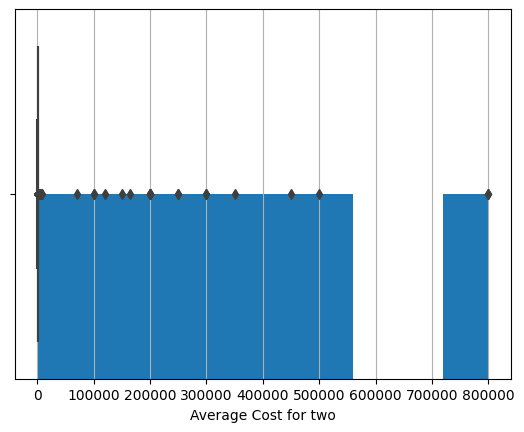

In [41]:
df['Average Cost for two'].hist()

sns.boxplot(x=df['Average Cost for two'])

In [43]:
# Rating distribution 

rating_distribution=df.groupby('Aggregate rating').agg({'Price range':'mean','Votes':'mean',

                                                        'Average Cost for two':'mean'}).sort_index()

In [44]:
rating_distribution

,Price range,Votes,Average Cost for two
Aggregate rating,,,
0.0,1.235102,0.870112,340.337523
1.8,3.000000,322.000000,1000.000000
1.9,1.500000,106.000000,375.000000
2.0,2.000000,129.714286,892.857143
2.1,1.733333,76.400000,633.333333
2.2,1.777778,94.962963,599.074074
2.3,1.787234,69.808511,565.957447
2.4,1.885057,97.011494,670.919540
2.5,1.827273,79.672727,622.272727
